In [17]:
!pip install wordcloud
!pip install contractions

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.1/511.1 KB 5.0 MB/s eta 0:00:00 MB/s eta 0:00:01:01
Defaulting to user installation because normal site-packages is not writeable


In [1]:
import pandas as pd
import contractions

In [6]:
all_data = pd.read_csv("../data/all-data.csv",encoding='latin-1', header=None)

In [7]:
all_data = all_data.rename(columns=lambda x: ['Sentiment', 'Sentence'][x])

In [10]:
sentiment_mapping = {'positive': 1, 'neutral': 0, 'negative': -1}
all_data['Sentiment'] = all_data['Sentiment'].map(sentiment_mapping)

In [11]:
all_data

,Sentiment,Sentence
0,0,"According to Gran , the company has no plans t..."
1,0,Technopolis plans to develop in stages an area...
2,-1,The international electronic industry company ...
3,1,With the new production plant the company woul...
4,1,According to the company 's updated strategy f...
...,...,...
4841,-1,LONDON MarketWatch -- Share prices ended lower...
4842,0,Rinkuskiai 's beer sales fell by 6.5 per cent ...
4843,-1,Operating profit fell to EUR 35.4 mn from EUR ...
4844,-1,Net sales of the Paper segment decreased to EU...


In [27]:
all_data.loc[all_data["Sentiment"]==1]

,Sentiment,Sentence
3,1,With the new production plant the company woul...
4,1,According to the company 's updated strategy f...
5,1,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...
6,1,"For the last quarter of 2010 , Componenta 's n..."
7,1,"In the third quarter of 2010 , net sales incre..."
...,...,...
4775,1,"The apartment block will be well-located , in ..."
4780,1,"The antibody , given at repeated doses of up t..."
4786,1,Danske Bank A-S DANSKE DC jumped 3.7 percent t...
4787,1,Our superior customer centricity and expertise...


EDA

In [18]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

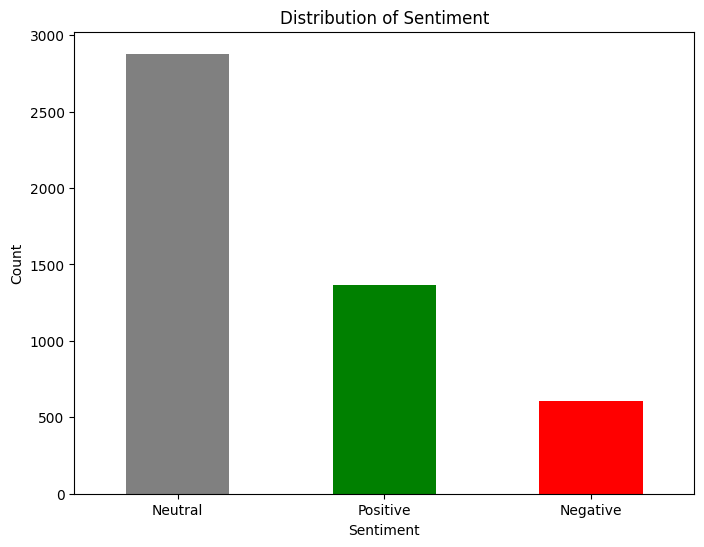

In [30]:
plt.figure(figsize=(8, 6))
all_data['Sentiment'].value_counts().plot(kind='bar', color=['gray', 'green', 'red'])
plt.title('Distribution of Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(ticks=[2, 0, 1], labels=['Negative', 'Neutral', 'Positive'], rotation=0)
plt.show()


Cleaning

In [32]:
from bs4 import BeautifulSoup
import re
import nltk
import tqdm
import unicodedata
import contractions
from nltk.tokenize import word_tokenize

def strip_html_tags(text):
  """
  Removes html tags from text taken for html pages
  """
  soup = BeautifulSoup(text, "html.parser")
  [s.extract() for s in soup(['iframe', 'script'])]
  stripped_text = soup.get_text()
  stripped_text = re.sub(r'[\r|\n|\r\n]+', '\n', stripped_text)
  return stripped_text

def remove_accented_chars(text):
  """
  Removes accents from chars
  """
  text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
  return text

def stopwords_removal(words):
    """
    Remvoves stopwords (english language) from the text
    """
    list_stopwords = nltk.corpus.stopwords.words('english')
    return [word for word in words if word not in list_stopwords]

In [34]:
def pre_process_corpus(docs):
  norm_docs = []
  for doc in tqdm.tqdm(docs):
    #case folding
    doc = doc.lower()
    #remove special characters\whitespaces
    doc = strip_html_tags(doc)
    doc = doc.translate(doc.maketrans("\n\t\r", "   "))
    doc = remove_accented_chars(doc)
    doc = contractions.fix(doc)
    doc = re.sub(r'[^a-zA-Z0-9\s]', '', doc, re.I|re.A)
    doc = re.sub(' +', ' ', doc)
    doc = doc.strip()
    #tokenize
    doc = word_tokenize(doc)
    #filtering
    doc = stopwords_removal(doc)
    norm_docs.append(doc)
  
  norm_docs = [" ".join(word) for word in norm_docs]
  return norm_docs

In [39]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /home/adam/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/adam/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/adam/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /home/adam/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [40]:
all_data['Clean sentences'] = pre_process_corpus(all_data["Sentence"])

 26%|██▌       | 1263/4846 [00:00<00:01, 2612.63it/s]/home/adam/.local/lib/python3.10/site-packages/bs4/__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(
100%|██████████| 4846/4846 [00:01<00:00, 2654.04it/s]


In [41]:
all_data

,Sentiment,Sentence,Clean sentences
0,0,"According to Gran , the company has no plans t...",according gran company plans move production r...
1,0,Technopolis plans to develop in stages an area...,technopolis plans develop stages area less 100...
2,-1,The international electronic industry company ...,international electronic industry company elco...
3,1,With the new production plant the company woul...,new production plant company would increase ca...
4,1,According to the company 's updated strategy f...,according company updated strategy years 20092...
...,...,...,...
4841,-1,LONDON MarketWatch -- Share prices ended lower...,london marketwatch share prices ended lower lo...
4842,0,Rinkuskiai 's beer sales fell by 6.5 per cent ...,rinkuskiai beer sales fell 65 per cent 416 mil...
4843,-1,Operating profit fell to EUR 35.4 mn from EUR ...,operating profit fell eur 354 mn eur 688 mn 20...
4844,-1,Net sales of the Paper segment decreased to EU...,net sales paper segment decreased eur 2216 mn ...


Class balancing, upscale the negative sentences

In [43]:
from sklearn.utils import resample

negative_upsample = resample(all_data.loc[all_data["Sentiment"]==-1], 
                                 replace=True,    
                                 n_samples= all_data.loc[all_data["Sentiment"]==1].shape[0],   
                                 random_state=1234)

In [47]:
all_data_final = pd.concat([all_data.loc[all_data["Sentiment"]==1],negative_upsample])

In [48]:
all_data_final.to_csv("all-data-processed.csv",index_label=False)

,Sentiment,Sentence,Clean sentences
3,1,With the new production plant the company woul...,new production plant company would increase ca...
4,1,According to the company 's updated strategy f...,according company updated strategy years 20092...
5,1,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...,financing aspocomp growth aspocomp aggressivel...
6,1,"For the last quarter of 2010 , Componenta 's n...",last quarter 2010 componenta net sales doubled...
7,1,"In the third quarter of 2010 , net sales incre...",third quarter 2010 net sales increased 52 eur ...
...,...,...,...
4750,-1,Operating profit in the fourth quarter fell to...,operating profit fourth quarter fell eur33m eu...
4002,-1,A total of 16.5 mn passenger ship journeys too...,total 165 mn passenger ship journeys took plac...
4319,-1,"However , the suspect stole his burgundy Nissa...",however suspect stole burgundy nissan altima
4686,-1,"( ADP News ) - Feb 4 , 2009 - Finnish broadban...",adp news feb 4 2009 finnish broadband data com...
